In [1]:
import numpy as np
from keras import models
from keras import layers
import pandas as pd
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def baselineModel(optimizer):
    model = models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=26,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
    return model
def lossFunction(loss):
    model = models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=26,activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss=loss,metrics=['acc'])
    return model

In [3]:
def graphPlot(history,o,l):
    acc      = history.history['acc']
    val_acc  = history.history['val_acc']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']
    epochs   = range(1,len(acc) + 1)

    #Validation vs Training in accuracy
    print(o," - ",l)
    
    plt.plot(epochs,acc,'g',label='training accuracy')
    plt.plot(epochs,val_acc,'b',label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs,loss,'g',label='training loss')
    plt.plot(epochs,val_loss,'b',label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data",header=None)

#features
features = dataset.iloc[:,1:].values
class_ = dataset.iloc[:, 0].values
X_train, X_test, Y_train, Y_test = train_test_split(features, class_, test_size = 0.25, random_state = 43325, stratify = class_)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from sklearn.preprocessing import LabelEncoder
Y_train = LabelEncoder().fit_transform(Y_train)
Y_test  = LabelEncoder().fit_transform(Y_test)
Y_train = Y_train.astype('float32')
Y_test  = Y_test.astype('float32')

# One hot encoding
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded  = to_categorical(Y_test)

#Standardization
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test  = (X_test - X_train_mean)  / X_train_std

#Validation data
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train_encoded, test_size = 0.2, random_state = 43325, stratify = Y_train_encoded)

eval_loss = dict()
optimizer = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Nadam', 'rmsprop']
loss = ['categorical_crossentropy','kullback_leibler_divergence', 'squared_hinge']    
    

Adam  -  categorical_crossentropy


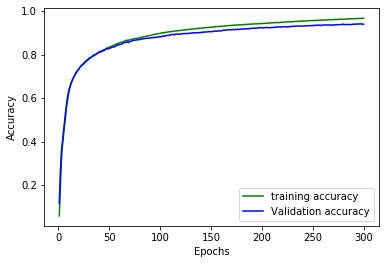

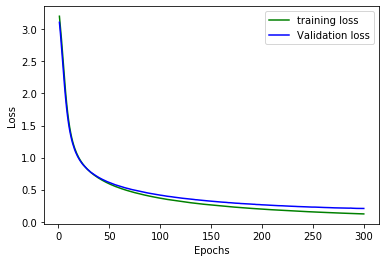




Adam  -  kullback_leibler_divergence


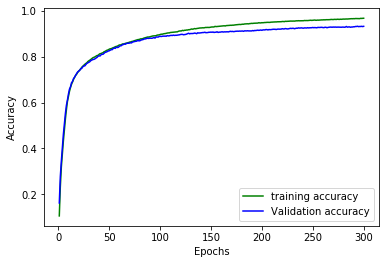

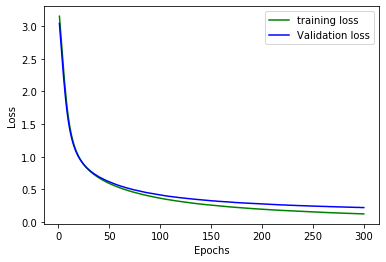




Adam  -  squared_hinge


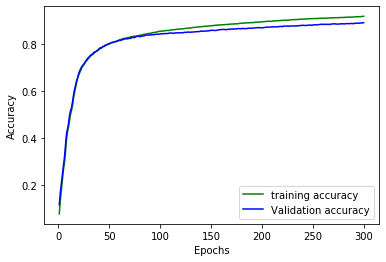

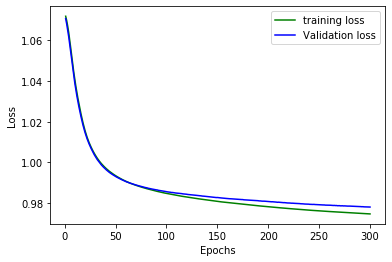

In [5]:
import time as t
optimizer_dict= dict()
optimizer_acc = dict()
for l in loss:
    loss_network = lossFunction(l)
    loss_history = loss_network.fit(x_train, y_train, epochs = 300, batch_size = 128, validation_data = (x_val, y_val), verbose=0)
    graphPlot(loss_history,'Adam',l)
    print("\n\n")

Adadelta  -  categorical_cross_entropy


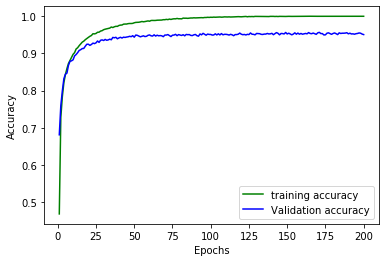

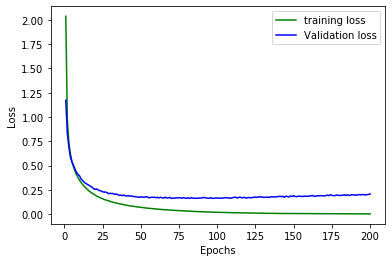

Optimizer used: Adadelta
Accuracy : 94.101833%
Convergence time : 15.877960920333862 seconds



Adagrad  -  categorical_cross_entropy


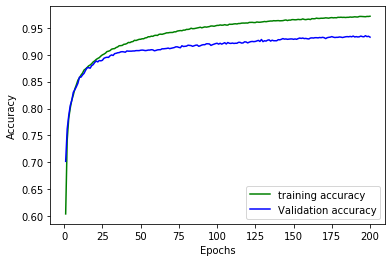

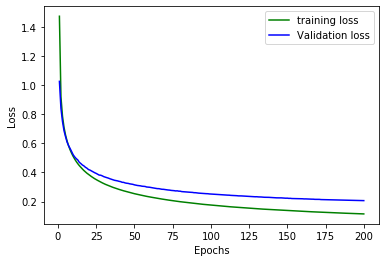

Optimizer used: Adagrad
Accuracy : 91.193667%
Convergence time : 15.322261095046997 seconds



Adam  -  categorical_cross_entropy


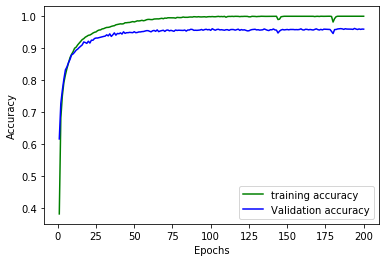

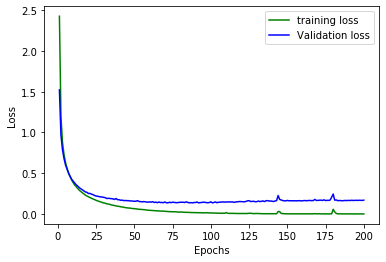

Optimizer used: Adam
Accuracy : 94.462500%
Convergence time : 17.58391785621643 seconds



Adamax  -  categorical_cross_entropy


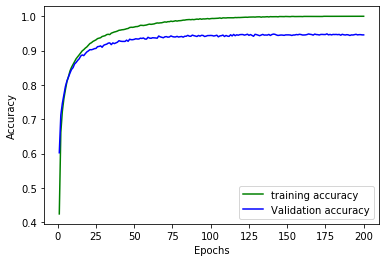

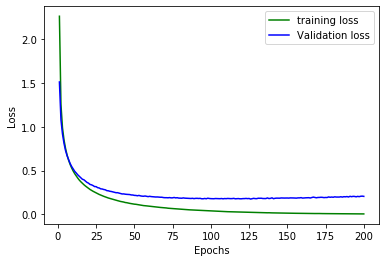

Optimizer used: Adamax
Accuracy : 92.869333%
Convergence time : 15.889303922653198 seconds



Nadam  -  categorical_cross_entropy


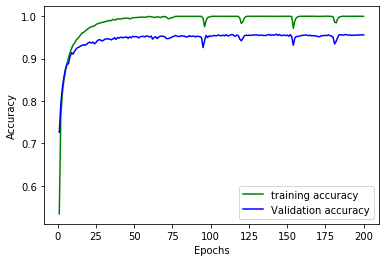

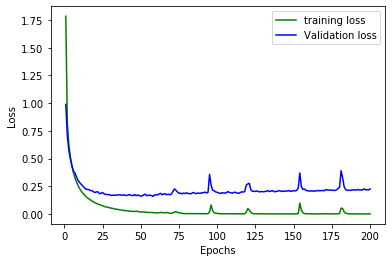

Optimizer used: Nadam
Accuracy : 94.595666%
Convergence time : 18.71945285797119 seconds



rmsprop  -  categorical_cross_entropy


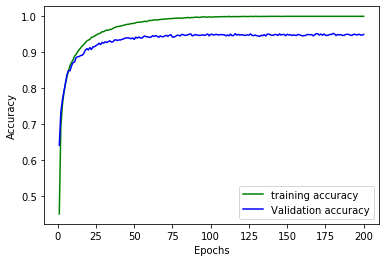

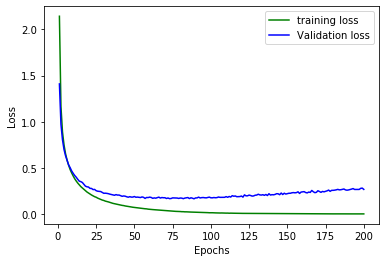

Optimizer used: rmsprop
Accuracy : 93.463833%
Convergence time : 14.773504972457886 seconds





In [6]:
for o in optimizer:
    network = baselineModel(o) 
    start_time = t.time() 
    history = network.fit(x_train, y_train, epochs = 200, batch_size = 128, validation_data = (x_val, y_val),verbose=0)
    end_time = t.time()
    graphPlot(history,o,"categorical_cross_entropy")
    time_taken = end_time-start_time
    optimizer_dict[o]=time_taken
    temp = np.average(history.history['val_acc'])
    optimizer_acc[o]=temp
    print("Optimizer used:",o)
    print("Accuracy :",'{:%}'.format(temp))
    print("Convergence time : %s seconds" % time_taken)
    
    print("\n\n")

Model 1
rmsprop  -  categorical_crossentropy


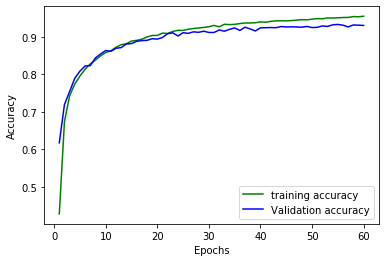

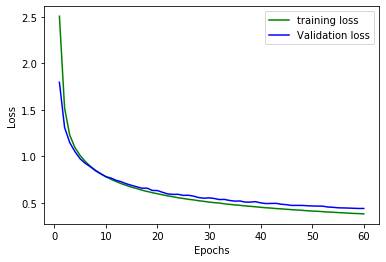

Accuracy: 92.720002% 

Model 2
rmsprop  -  categorical_crossentropy


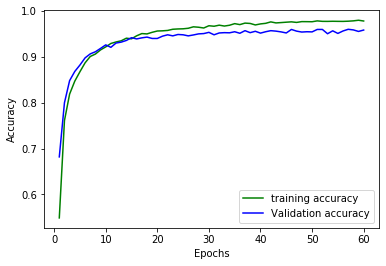

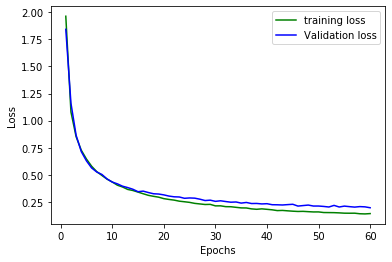

Accuracy: 95.859998% 

Model 3
rmsprop  -  categorical_crossentropy


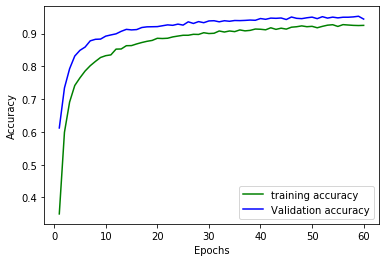

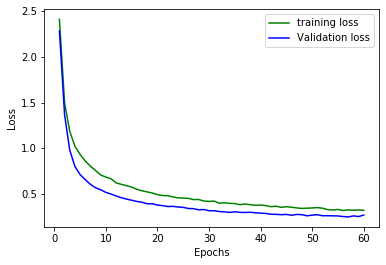

Accuracy: 94.720000% 

Final accuracy  96.280000%


In [7]:
def model1():
    model = models.Sequential()
    model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.005),input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(units=26,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
    return model
def model2():
    model = models.Sequential()
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.005),input_shape=(X_train.shape[1], )))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(units=26,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
    return model
def model3():
    model = models.Sequential()
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(X_train.shape[1], )))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=26,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
    return model
print("Model 1")
network = model1()
history = network.fit(x_train,y_train,epochs = 60, batch_size = 128, validation_data=(x_val,y_val),verbose=0)
graphPlot(history,'rmsprop','categorical_crossentropy')
output1 = network.predict(X_test,verbose = 0)
_,model_acc = network.evaluate(X_test,Y_test_encoded,verbose = 0)
print("Accuracy:",'{:%}'.format(model_acc),"\n")
print("Model 2")
network = model2()
history = network.fit(x_train,y_train,epochs = 60, batch_size = 128, validation_data=(x_val,y_val),verbose=0)
graphPlot(history,'rmsprop','categorical_crossentropy')
output2 = network.predict(X_test, verbose = 0)
_,model_acc = network.evaluate(X_test,Y_test_encoded,verbose = 0)
print("Accuracy:",'{:%}'.format(model_acc),"\n")
print("Model 3")
network = model3()
history = network.fit(x_train,y_train,epochs = 60, batch_size = 128, validation_data=(x_val,y_val),verbose=0)
graphPlot(history,'rmsprop','categorical_crossentropy')
output3 = network.predict(X_test,verbose = 0)
_,model_acc = network.evaluate(X_test,Y_test_encoded, verbose = 0)
print("Accuracy:",'{:%}'.format(model_acc),"\n")

avgPred = (output1 + output2 + output3)/3
count = 0

for i in range(avgPred.shape[0]):
    if np.argmax(Y_test_encoded[i]) == np.argmax(avgPred[i]):
        count+=1

avgAcc = (count/avgPred.shape[0])
print("Final accuracy ",'{:%}'.format(avgAcc))